<a href="https://colab.research.google.com/github/HastiSoudbakhsh/Netflix-Analysis/blob/main/Airline_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import warnings
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving cleand_airline_data.csv to cleand_airline_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['cleand_airline_data.csv']))

In [ ]:
#df.drop('flying_m', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Passanger_Name             0
Flying_month               0
Route                      0
Rating                     0
Review_title               0
Review_content             0
Traveller_type             0
Class                      0
flying_m                   0
Sentiment_content_label    0
Sentiment_title_label      0
Origin                     0
Destination                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Passanger_Name           946 non-null    object 
 1   Flying_month             946 non-null    object 
 2   Route                    946 non-null    object 
 3   Rating                   946 non-null    float64
 4   Review_title             946 non-null    object 
 5   Review_content           946 non-null    object 
 6   Traveller_type           946 non-null    object 
 7   Class                    946 non-null    object 
 8   flying_m                 946 non-null    object 
 9   Sentiment_content_label  946 non-null    object 
 10  Sentiment_title_label    946 non-null    object 
 11  Origin                   946 non-null    object 
 12  Destination              946 non-null    object 
dtypes: float64(1), object(12)
memory usage: 96.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,946.0,2.995772,2.760259,1.0,1.0,2.0,4.0,10.0


In [ ]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Review_title',
       'Review_content', 'Traveller_type', 'Class', 'Sentiment_content_label',
       'Sentiment_title_label', 'Origin', 'Destination'],
      dtype='object')

**splitting the flying_m0nth to month and year**

In [ ]:
df['new_flying_month'] =df['Flying_month'].apply(lambda x: x[:3])
df['new_flying_month']

0      Jun
1      Mar
2      Jun
3      Jun
4      Jun
      ... 
941    Nov
942    Jun
943    Jun
944    Jun
945    Jun
Name: new_flying_month, Length: 946, dtype: object

In [ ]:
df['new_flying_year'] = df['Flying_month'].apply(lambda x: x[4:])
df['new_flying_year']

0      23
1      23
2      23
3      23
4      23
       ..
941    14
942    15
943    15
944    15
945    15
Name: new_flying_year, Length: 946, dtype: object

In [ ]:
# duplicated values
df.duplicated().value_counts()

False    946
dtype: int64

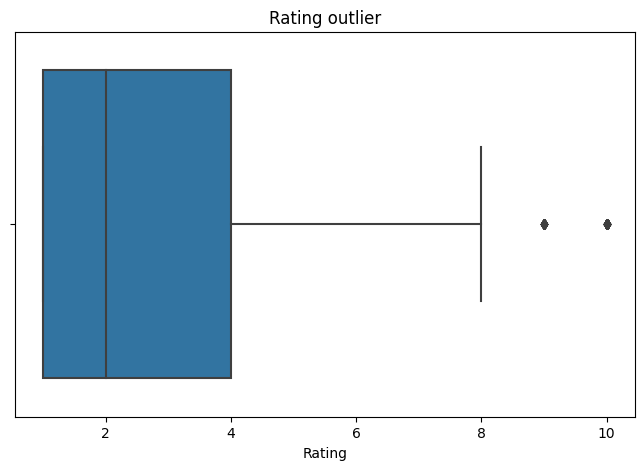

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ratings = df['Rating']

plt.figure(figsize=(8, 5))
sns.boxplot(x=ratings)
plt.title("Rating outlier")
plt.show()

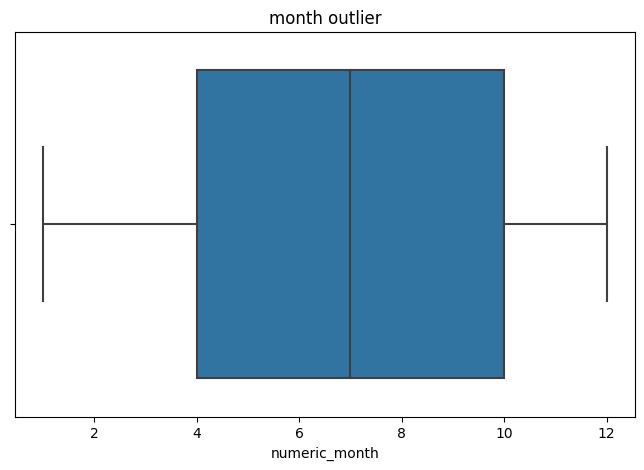

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

month = df['numeric_month']

plt.figure(figsize=(8, 5))
sns.boxplot(x=month)
plt.title("month outlier")
plt.show()

Value Count For:  Negative    577
Positive    352
Neutral      17
Name: Sentiment_content_label, dtype: int64


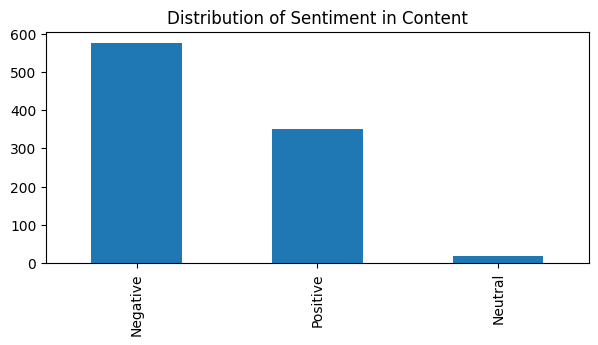

In [ ]:
value_counts = df['Sentiment_content_label'].value_counts()
print('Value Count For: ', value_counts)

value_counts = df['Sentiment_content_label'].value_counts().plot(kind = 'bar',title = 'Distribution of Sentiment in Content', figsize = (7, 3))

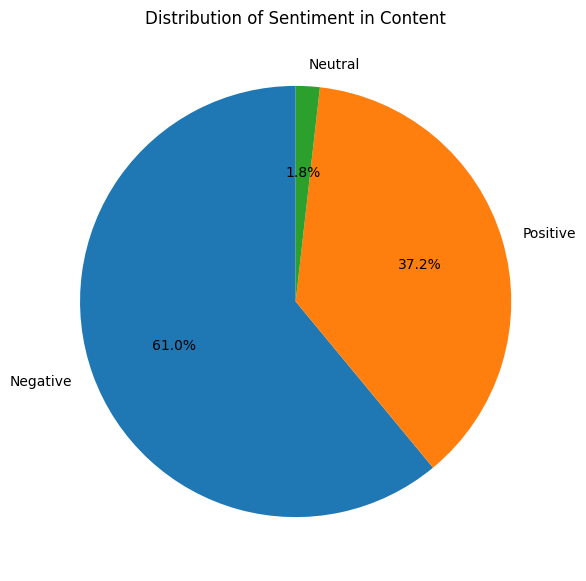

In [ ]:
import matplotlib.pyplot as plt

value_counts = df['Sentiment_content_label'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment in Content')
plt.show()

Value Count For:  Neutral     405
Negative    375
Positive    166
Name: Sentiment_title_label, dtype: int64


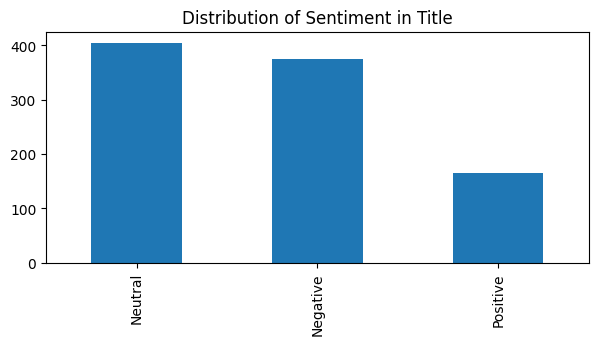

In [ ]:
value_counts = df['Sentiment_title_label'].value_counts()
print('Value Count For: ', value_counts)

value_counts = df['Sentiment_title_label'].value_counts().plot(kind = 'bar',title = 'Distribution of Sentiment in Title', figsize = (7, 3))

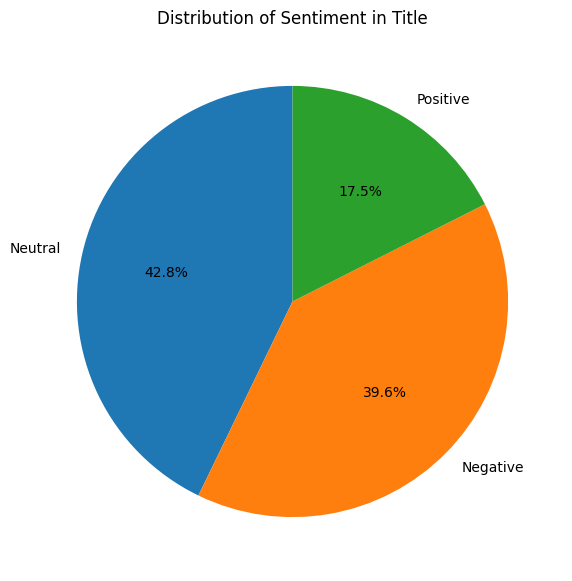

In [ ]:
import matplotlib.pyplot as plt

value_counts = df['Sentiment_title_label'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment in Title')
plt.show()

In [ ]:
# dropping sentiment_title_lable column
df.drop('Sentiment_title_label', axis=1, inplace=True)

In [ ]:
#####################################################

In [ ]:
####### agar bekhaym numeric konim

target_map = {'positive':'1', 'negative':'0'}
data['target'] = data['Sentiment_Label'].map(target_map)
data.head()

In [ ]:
##### month mapping

months_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for month, num in months_mapping.items():
    new_flying_month['Month_num'] = new_flying_month['Month_num'].replace(month, num)

In [ ]:
##### season

# Creating Seasons
def find_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

df['Departure_Season'] = df['Departure_Month'].apply(find_season)

In [ ]:
################################################

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['Rating'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.728, p=0.728
Probably not Gaussian


<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

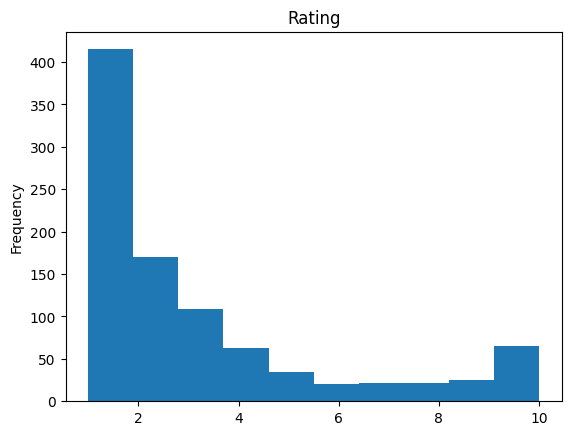

In [ ]:
df['Rating'].plot(kind = 'hist', title = 'Rating')

# **Q1: Factors affecting customers choice**

In [ ]:
# class type and the customer satisfaction
# traveller type and customer satisfaction
# origin or destination

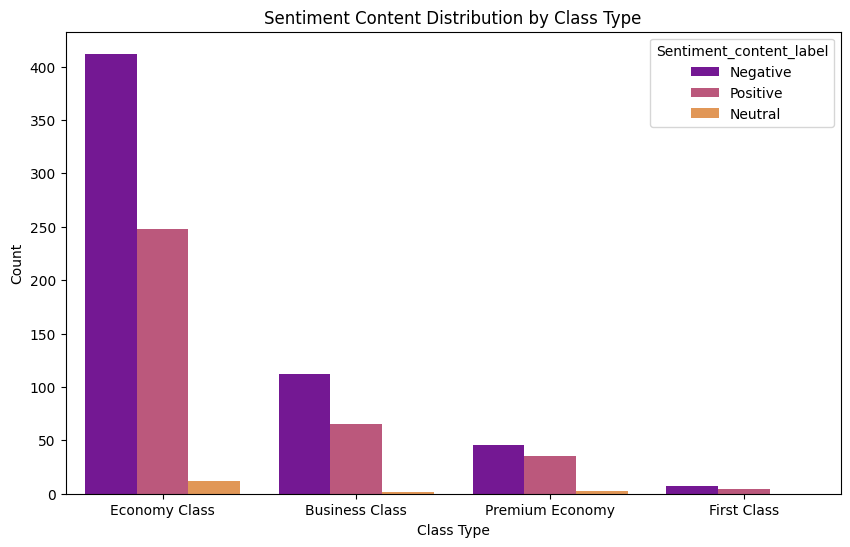

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Sentiment_content_label', data=df, palette='plasma')
plt.title('Sentiment Content Distribution by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

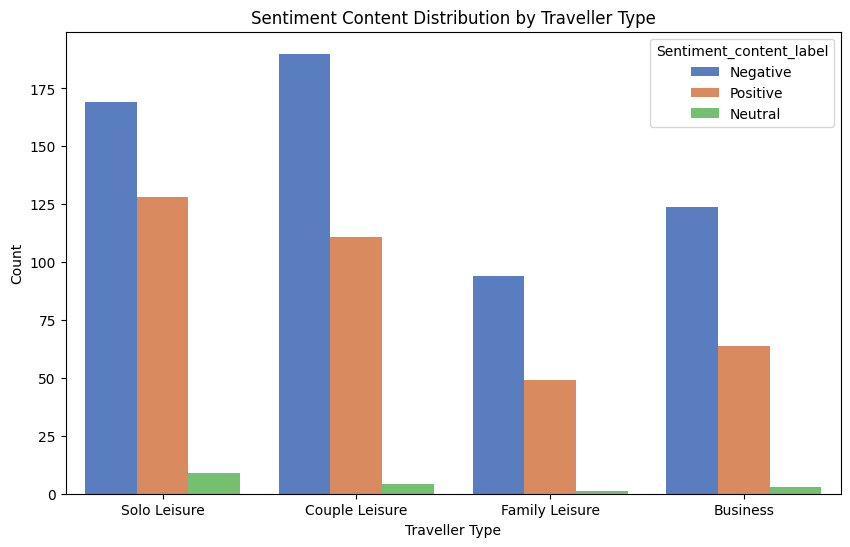

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


plt.figure(figsize=(10, 6))
sns.countplot(x='Traveller_type', hue='Sentiment_content_label', data=df, palette='muted')
plt.title('Sentiment Content Distribution by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.show()

In [ ]:
############# Statistics

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Rating'], df['Traveller_type'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square value and p-value
print(f'Chi-square value: {chi2}')
rounded_p = round(p, 3)
print(f'P-value: {rounded_p}')

# Interpret the results
alpha = 0.05
if rounded_p < alpha:
    print("H0.There is a significant association between Rating and Traveller_type.")
else:
    print("H1.There is no significant association between Rating and Traveller_type.")

Chi-square value: 49.0935020728614
P-value: 0.006
H0.There is a significant association between Rating and Traveller_type.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Rating'], df['Class'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square value and p-value
print(f'Chi-square value: {chi2}')
rounded_p = round(p, 3)
print(f'P-value: {rounded_p}')

# Interpret the results
alpha = 0.05
if rounded_p < alpha:
    print("H0.There is a significant association between Rating and Class type.")
else:
    print("H1.There is no significant association between Rating and Class type.")

Chi-square value: 47.5785321303329
P-value: 0.009
H0.There is a significant association between Rating and Class type.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['new_flying_month'], df['Route'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square value and p-value
print(f'Chi-square value: {chi2}')
rounded_p = round(p, 3)
print(f'P-value: {rounded_p}')

# Interpret the results
alpha = 0.05
if rounded_p < alpha:
    print("H0.There is a significant association between Flying month and Route.")
else:
    print("H1.There is no significant association between Flying month and Route.")

Chi-square value: 8048.114827715584
P-value: 0.341
H1.There is no significant association between Flying month and Route.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Class'], df['Traveller_type'])

#Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square value: {chi2}')
rounded_p = round(p, 3)
print(f'P-value: {rounded_p}')

#results
alpha = 0.05
if rounded_p < alpha:
    print("H0.There is a significant association between Class and Traveller_type.")
else:
    print("H1.There is no significant association between Class and Traveller_type.")

Chi-square value: 59.75934366337469
P-value: 0.0
H0.There is a significant association between Class and Traveller_type.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Class'], df['Route'])

#chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square value and p-value
print(f'Chi-square value: {chi2}')
rounded_p = round(p, 3)
print(f'P-value: {rounded_p}')

alpha = 0.05
if rounded_p < alpha:
    print("H0.There is a significant association between Class and Route.")
else:
    print("H1.There is no significant association between Class and Route.")

Chi-square value: 2301.3286517912566
P-value: 0.036
H0.There is a significant association between Class and Route.


# **Q2: Holoday booking and customer behaviour**

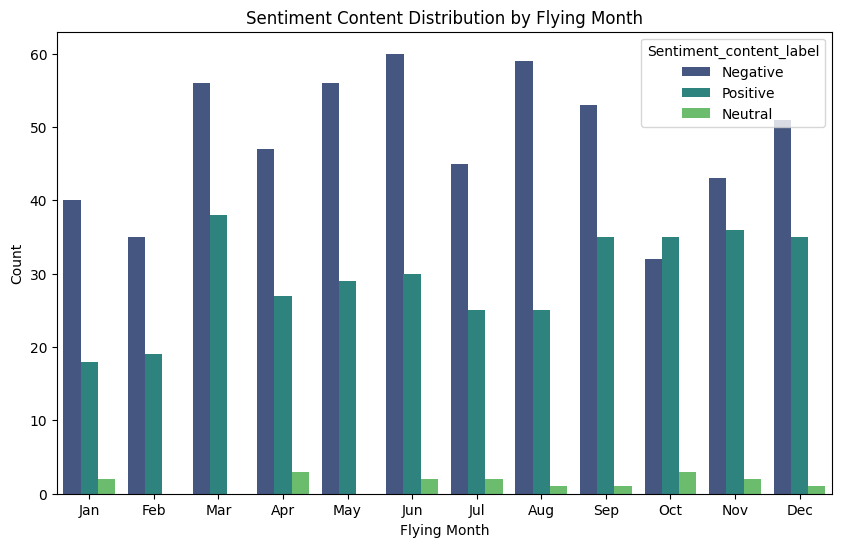

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['new_flying_month'] = pd.Categorical(df['new_flying_month'], categories=months_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='new_flying_month', hue='Sentiment_content_label', data=df, palette='viridis')
plt.title('Sentiment Content Distribution by Flying Month')
plt.xlabel('Flying Month')
plt.ylabel('Count')
plt.show()

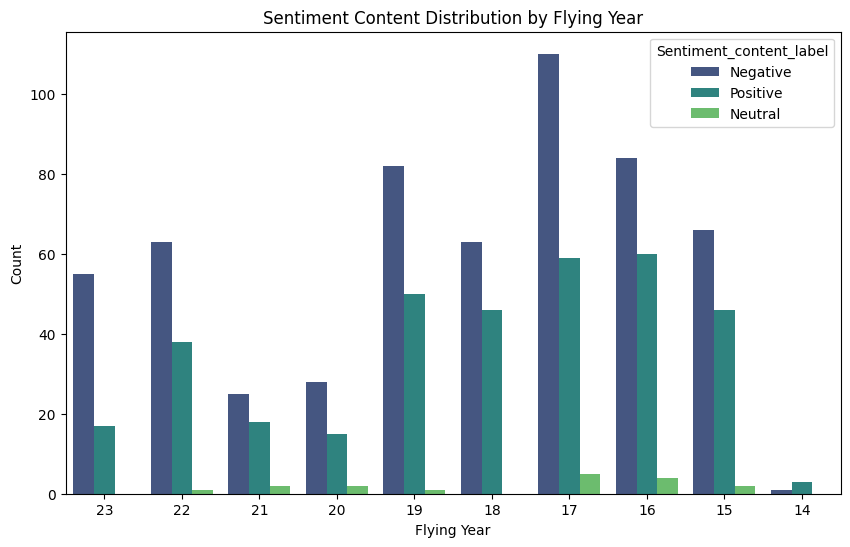

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

plt.figure(figsize=(10, 6))
sns.countplot(x='new_flying_year', hue='Sentiment_content_label', data=df, palette='viridis')
plt.title('Sentiment Content Distribution by Flying Year')
plt.xlabel('Flying Year')
plt.ylabel('Count')
plt.show()

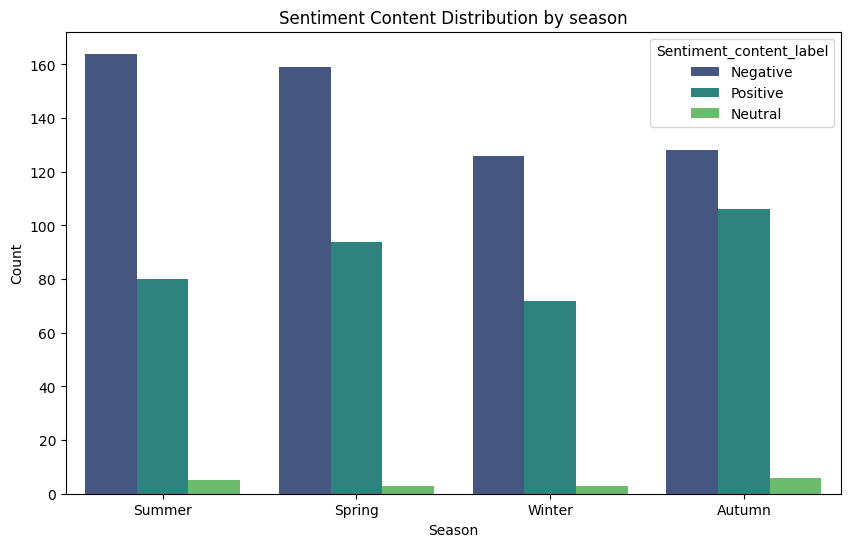

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='Sentiment_content_label', data=df, palette='viridis')
plt.title('Sentiment Content Distribution by season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

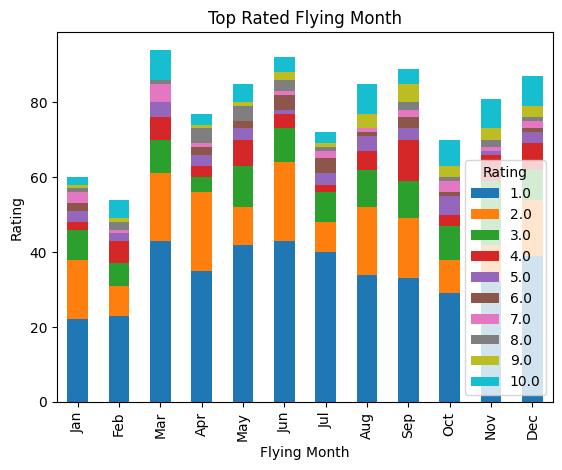

In [ ]:
import matplotlib.pyplot as plt

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['new_flying_month'] = pd.Categorical(df['new_flying_month'], categories=months_order, ordered=True)

plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['new_flying_month', 'Rating']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title("Top Rated Flying Month")
plt.xlabel("Flying Month")
plt.ylabel("Rating")
plt.show()

<Figure size 1000x600 with 0 Axes>

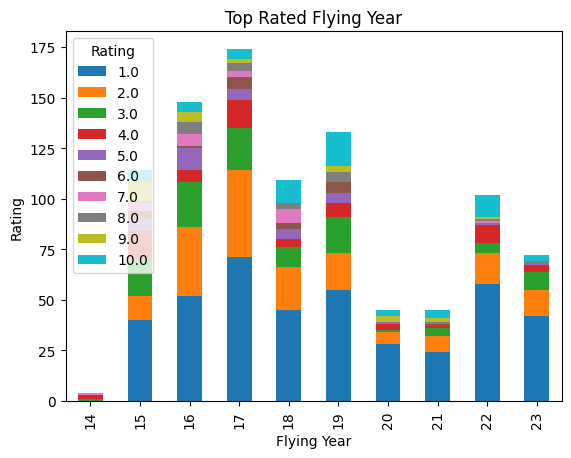

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['new_flying_year', 'Rating']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title("Top Rated Flying Year")
plt.xlabel("Flying Year")
plt.ylabel("Rating")
plt.show()

<Figure size 1000x600 with 0 Axes>

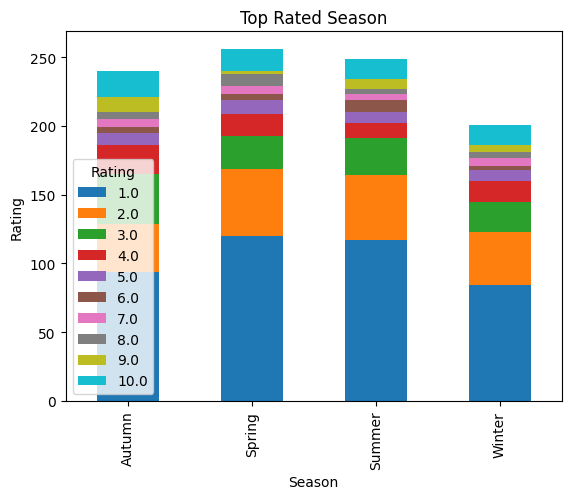

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['season', 'Rating']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title("Top Rated Season")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.show()

In [ ]:
# relation bet flying month and chosing a class type

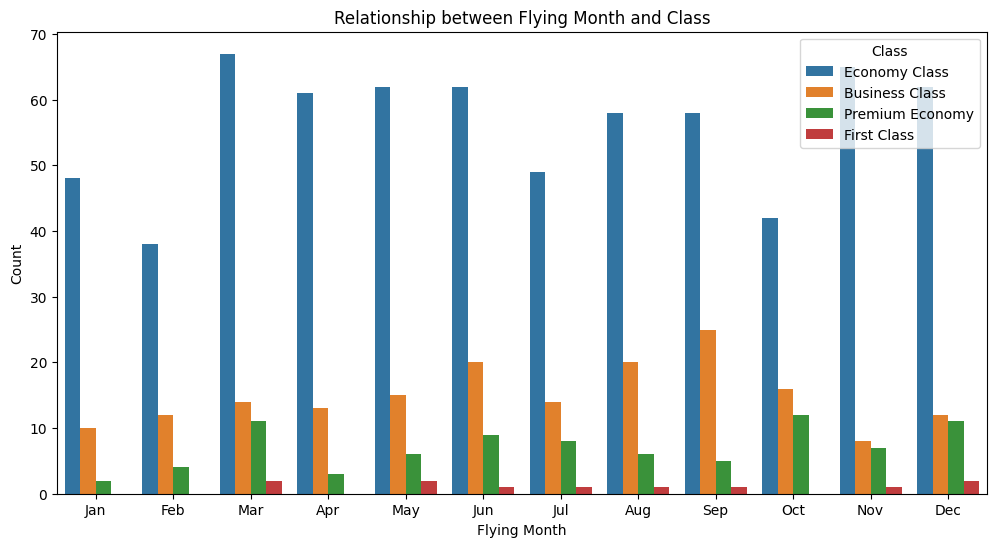

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['new_flying_month'] = pd.Categorical(df['new_flying_month'], categories=months_order, ordered=True)

# Plotting the relationship between Flying Month and Class
plt.figure(figsize=(12, 6))
sns.countplot(x='new_flying_month', hue='Class', data=df)
plt.title("Relationship between Flying Month and Class")
plt.xlabel("Flying Month")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.show()

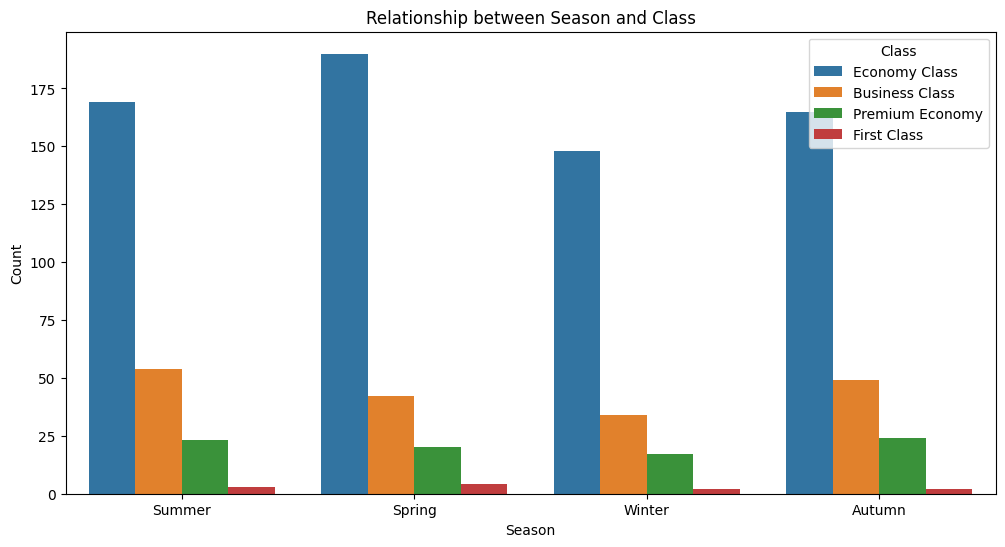

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='Class', data=df)
plt.title("Relationship between Season and Class")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.show()

In [ ]:
# the relation bet flying month and traveller type

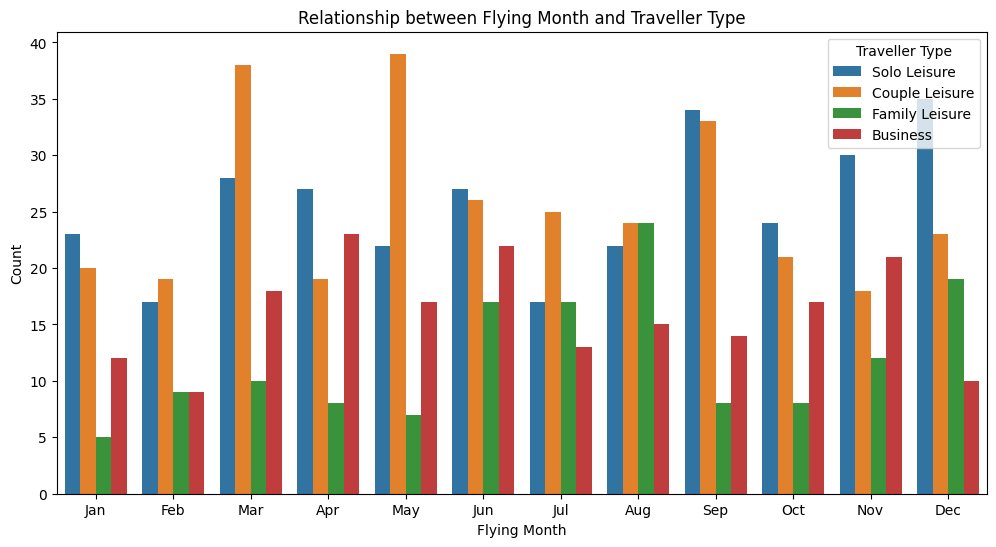

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'new_flying_month' to a categorical data type with custom order
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['new_flying_month'] = pd.Categorical(df['new_flying_month'], categories=months_order, ordered=True)

# Plotting the relationship between Flying Month and Traveller Type
plt.figure(figsize=(12, 6))
sns.countplot(x='new_flying_month', hue='Traveller_type', data=df)
plt.title("Relationship between Flying Month and Traveller Type")
plt.xlabel("Flying Month")
plt.ylabel("Count")
plt.legend(title='Traveller Type', loc='upper right')
plt.show()

In [ ]:
# relation between traveller type and class type

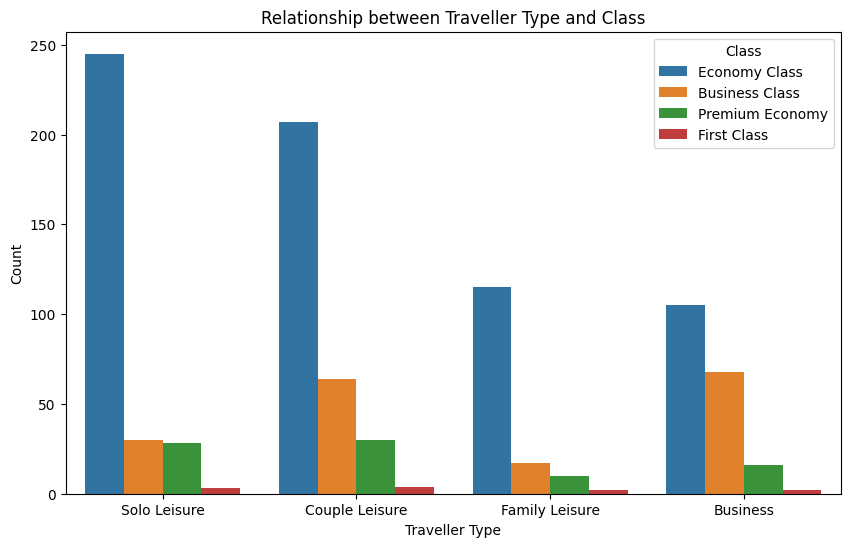

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Traveller_type', hue='Class', data=df)
plt.title("Relationship between Traveller Type and Class")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.show()

In [ ]:
############### Statistic

In [ ]:
#month mapping

df['numeric_month'] = df['new_flying_month'].copy()

months_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for month, num in months_mapping.items():
    df['numeric_month'] = df['numeric_month'].replace(month, num)

In [ ]:
 df['numeric_month']

0       6
1       3
2       6
3       6
4       6
       ..
941    11
942     6
943     6
944     6
945     6
Name: numeric_month, Length: 946, dtype: int64

In [ ]:
# provide the normality test to see if month_numeric has a normal distribution or not

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['numeric_month'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.947, p=0.947
Probably not Gaussian


<Axes: title={'center': 'numeric_month'}, ylabel='Frequency'>

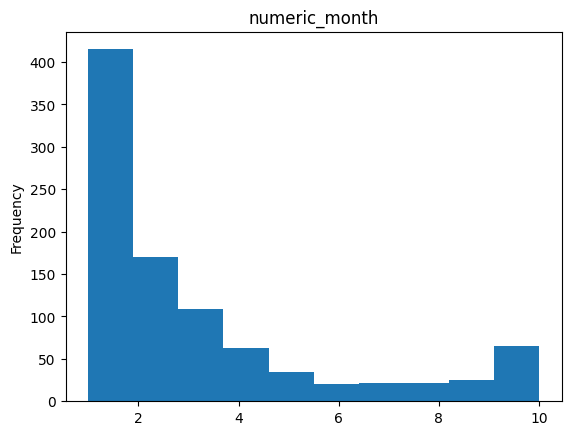

In [ ]:
df['Rating'].plot(kind = 'hist', title = 'numeric_month')

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

df = df.dropna(subset=['numeric_month'])

# one-way ANOVA test
anova_result = f_oneway(*[group['numeric_month'] for name, group in df.groupby('Traveller_type')])

print("ANOVA result:")
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

# results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("null hypothesis is rejected.")
else:
    print("null hypothesis is accepted.")

ANOVA result:
F-statistic: 2.7384571646979663
P-value: 0.04235643334747019
null hypothesis is rejected.


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

df = df.dropna(subset=['numeric_month'])

# one-way ANOVA
anova_result = f_oneway(*[group['numeric_month'] for name, group in df.groupby('Class')])

print("ANOVA result:")
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

# results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("null hypothesis is rejected.")
else:
    print("null hypothesis is accepted.")

ANOVA result:
F-statistic: 1.258295182472791
P-value: 0.2874725748274304
null hypothesis is accepted.


# **Q3:predict the liklihood of successful holiday booking based on customer characteristics**

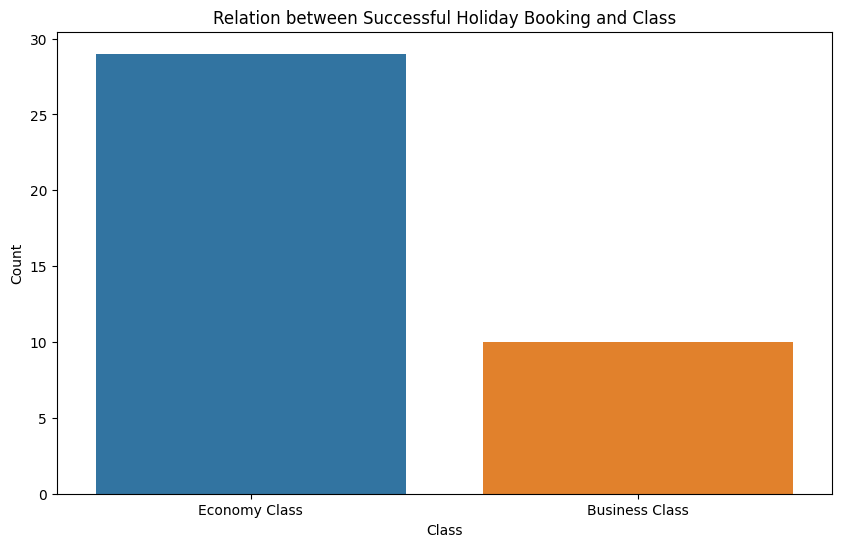

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions
filtered_df = df[(df['Sentiment_content_label'] == 'Positive')  & (df['Rating'] > 5) &
 (df['new_flying_month'].isin(['Apr', 'Aug', 'Dec']))]

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=filtered_df)
plt.title("Relation between Successful Holiday Booking and Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

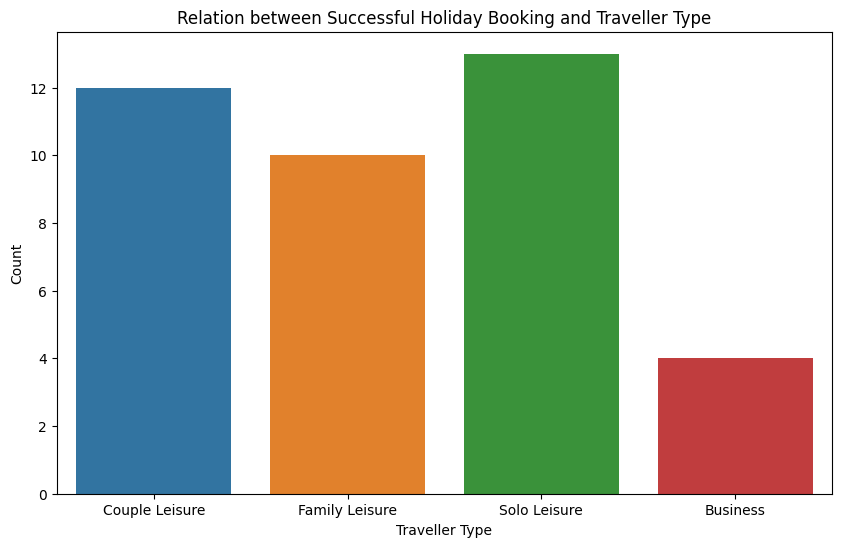

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[(df['Sentiment_content_label'] == 'Positive')  & (df['Rating'] > 5) &
                 (df['new_flying_month'].isin(['Apr', 'Aug', 'Dec']))]

plt.figure(figsize=(10, 6))
sns.countplot(x='Traveller_type', data=filtered_df)
plt.title("Relation between Successful Holiday Booking and Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.show()

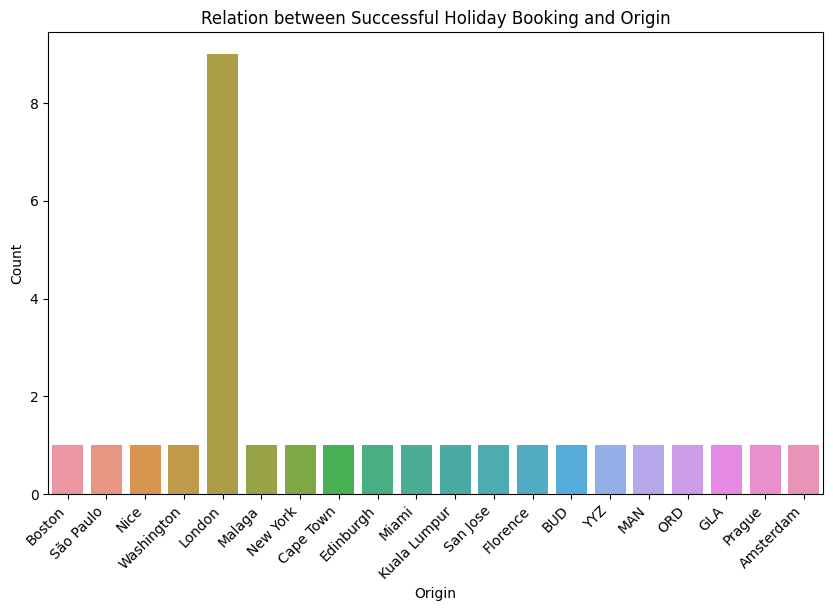

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the DataFrame based on conditions
filtered_df = df[(df['Sentiment_content_label'] == 'Positive') & (df['Sentiment_title_label'] == 'Positive') & (df['Rating'] > 5) & (df['new_flying_month'].isin(['Apr', 'Aug', 'Dec']))]

# Create a count plot for the filtered DataFrame and class
plt.figure(figsize=(10, 6))
sns.countplot(x='Origin', data=filtered_df)
plt.title("Relation between Successful Holiday Booking and Origin")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

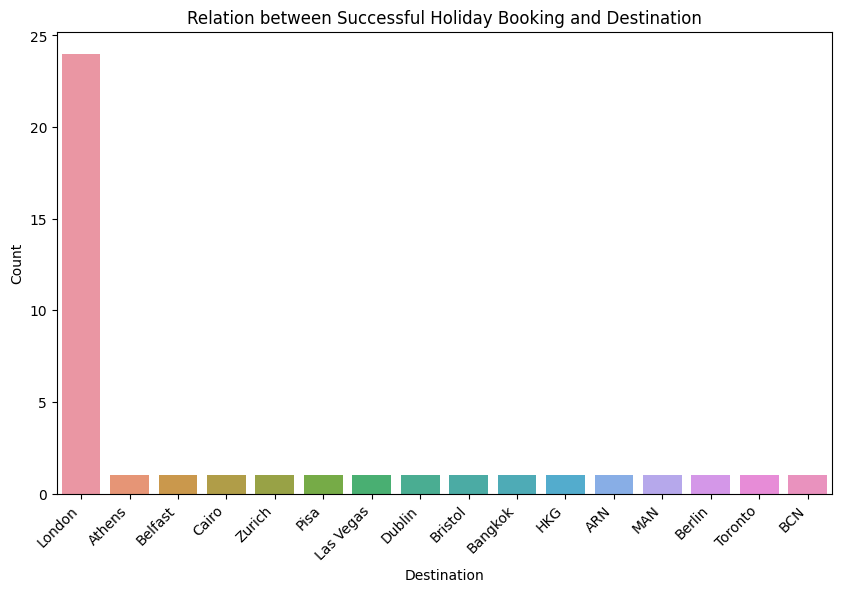

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[(df['Sentiment_content_label'] == 'Positive')  & (df['Rating'] > 5)
& (df['new_flying_month'].isin(['Apr', 'Aug', 'Dec']))]

plt.figure(figsize=(10, 6))
sns.countplot(x='Destination', data=filtered_df)
plt.title("Relation between Successful Holiday Booking and Destination")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

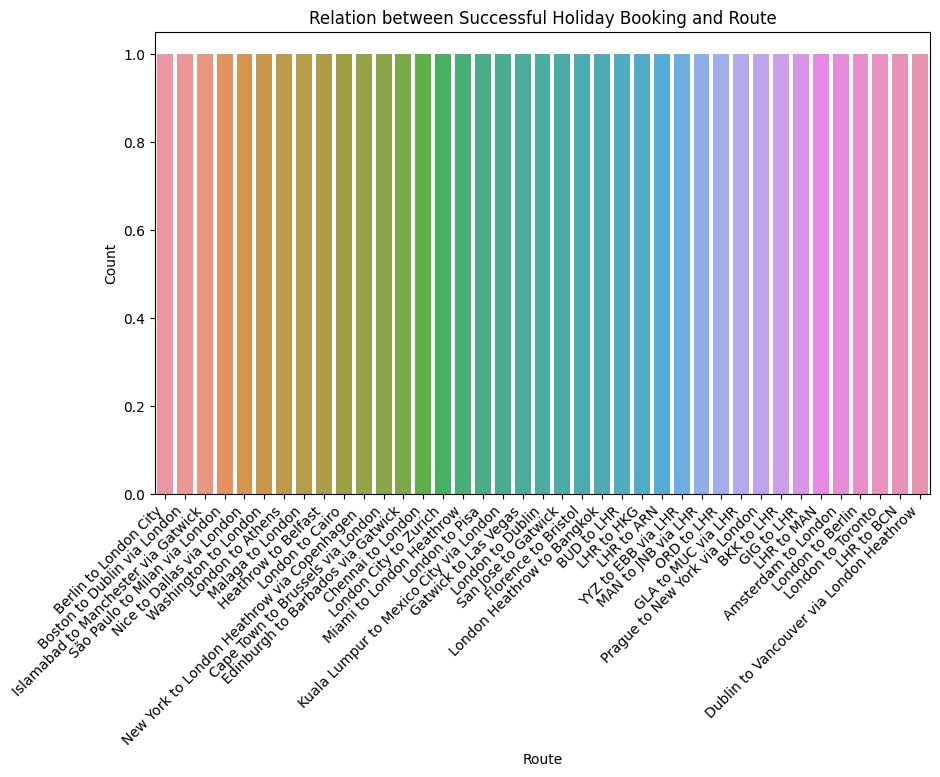

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[(df['Sentiment_content_label'] == 'Positive')  & (df['Rating'] > 5)
& (df['new_flying_month'].isin(['Apr', 'Aug', 'Dec']))]

plt.figure(figsize=(10, 6))
sns.countplot(x='Route', data=filtered_df)
plt.title("Relation between Successful Holiday Booking and Route")
plt.xlabel("Route")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# **Q4: popularity of various routes and flight scheduales**

In [ ]:
#This code will replace any occurrence of 'London', 'LHR', 'Heathrow' , gatewick , LGW in the "destination" and "origin" columns with 'London'
# in a incase sensetive format


df.loc[df['Destination'].str.contains('London|LHR|Heathrow|Gatwick|LGW',
                                      case=False, na=False), 'Destination'] = 'London'
df.loc[df['Origin'].str.contains('London|LHR|Heathrow|Gatwick|LGW',
                                 case=False, na=False), 'Origin'] = 'London'



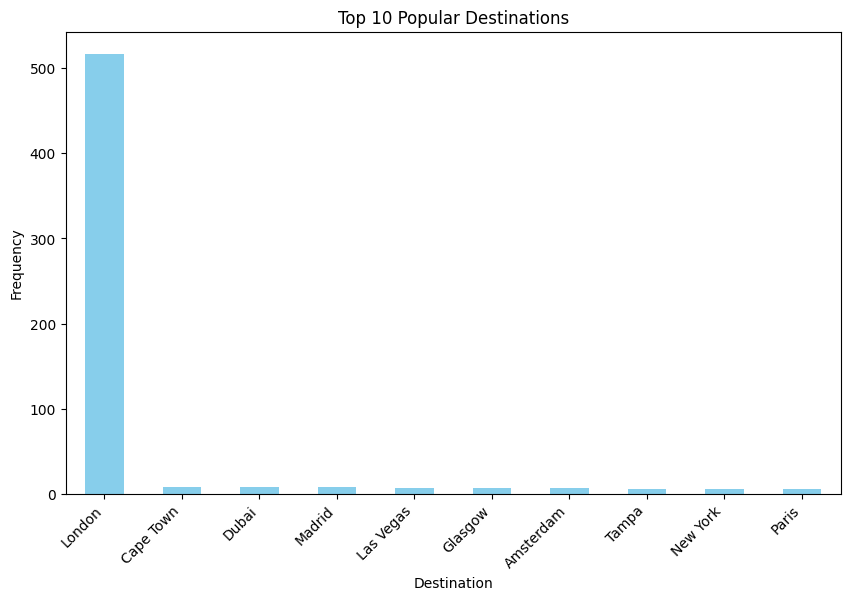

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_destinations = df['Destination'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_destinations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Destinations')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

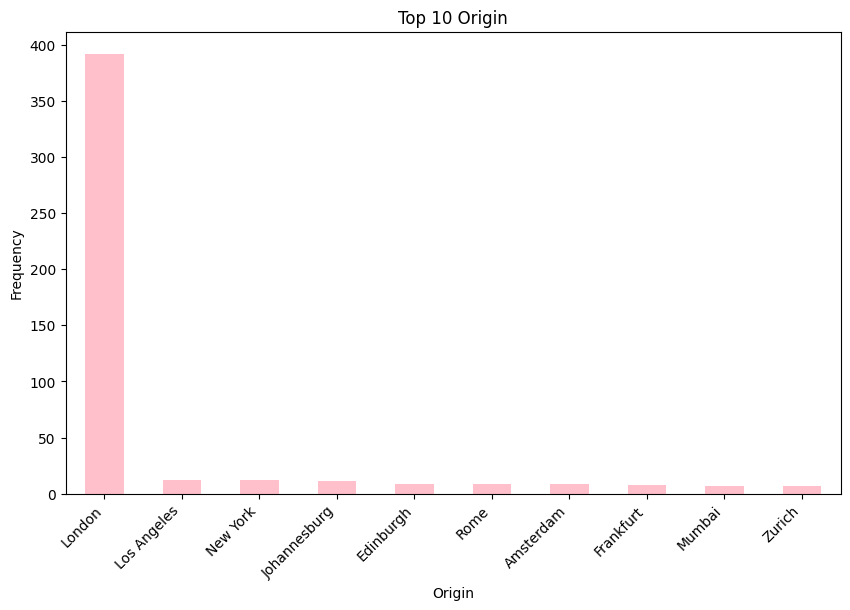

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_origin = df['Origin'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_origin.plot(kind='bar', color='pink')
plt.title('Top 10 Origin')
plt.xlabel('Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

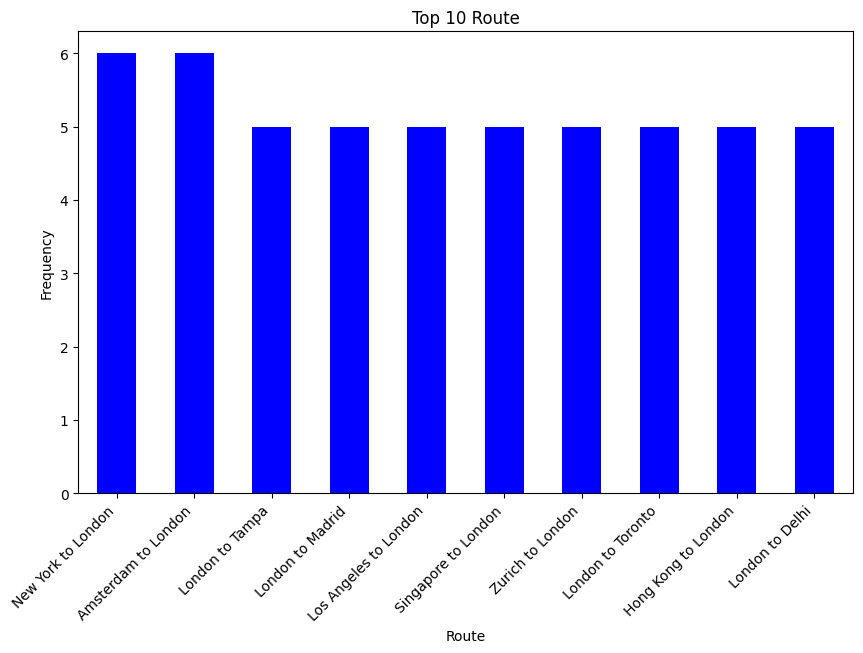

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_route = df['Route'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_route.plot(kind='bar', color='blue')
plt.title('Top 10 Route')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# relation between route and class

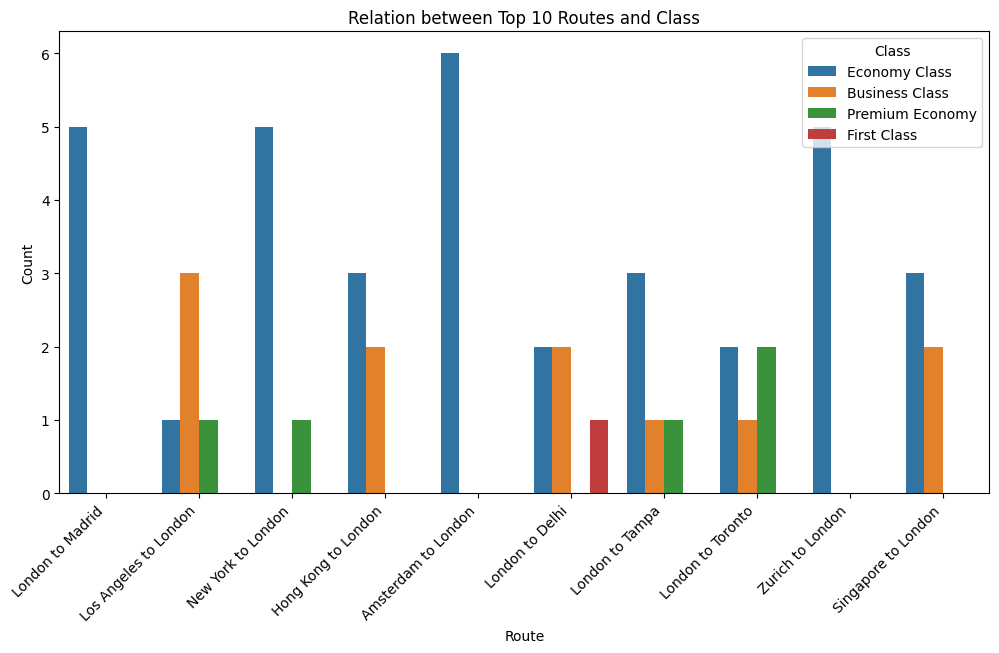

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_routes = df['Route'].value_counts().head(10).index

df_top_routes = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='Class', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Class")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# relation between route and month or seoson

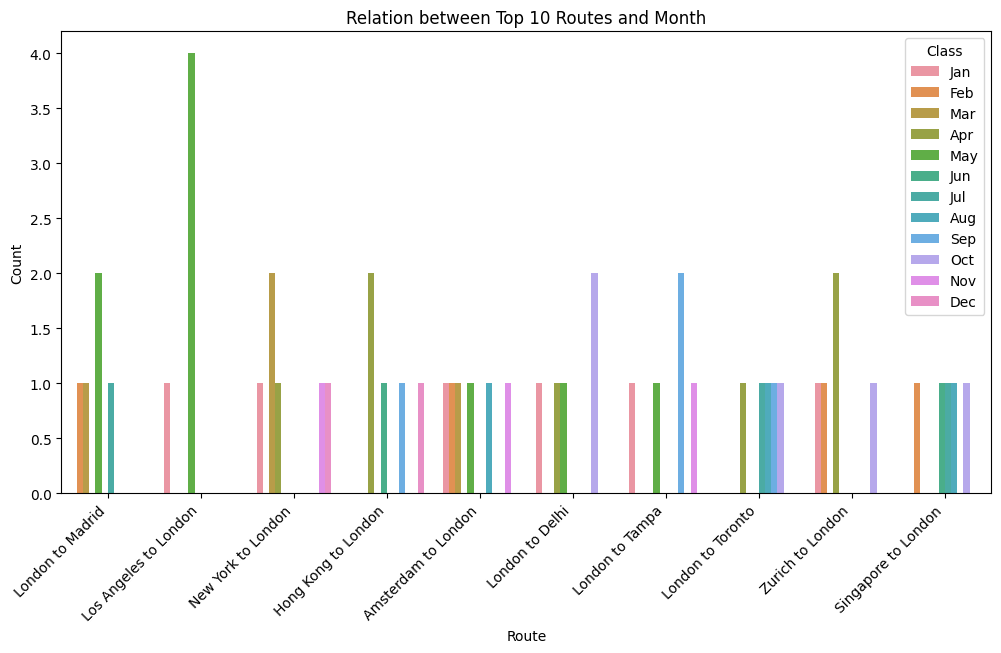

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['new_flying_month'] = pd.Categorical(df['new_flying_month'], categories=months_order, ordered=True)

top_routes = df['Route'].value_counts().head(10).index

df_top_routes = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='new_flying_month', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Month")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# hala agar vasash seson dar nazar begirim:

In [ ]:
##### season

df['season'] = df['numeric_month'].copy()

# Creating Seasons
def find_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

df['season'] = df['season'].apply(find_season)

In [ ]:
df['season']

0      Summer
1      Spring
2      Summer
3      Summer
4      Summer
        ...  
941    Autumn
942    Summer
943    Summer
944    Summer
945    Summer
Name: season, Length: 946, dtype: object

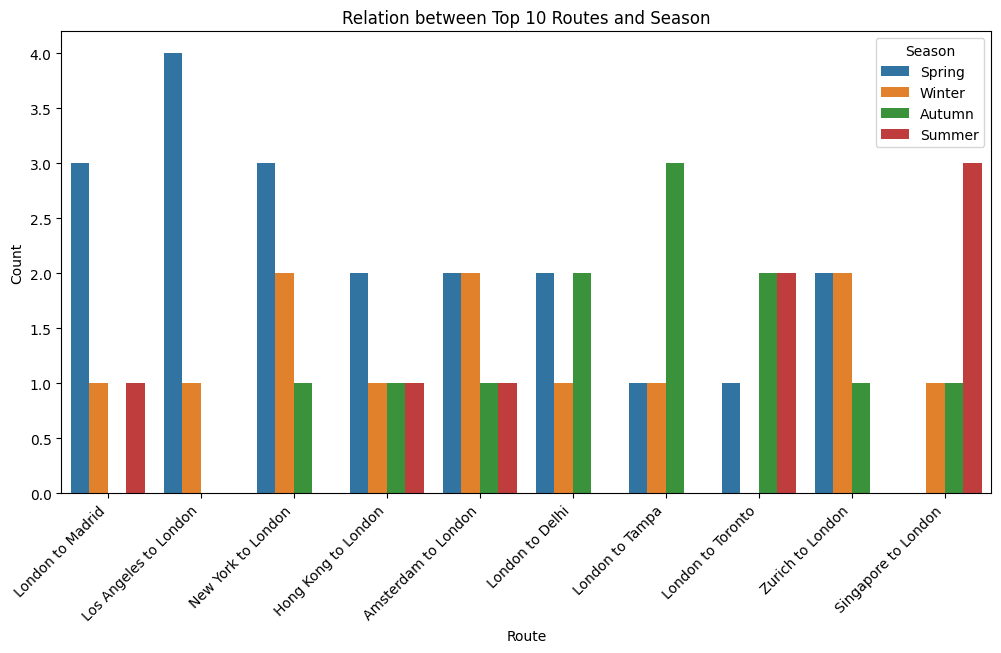

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


top_routes = df['Route'].value_counts().head(10).index

df_top_routes = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='season', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Season")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Season', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

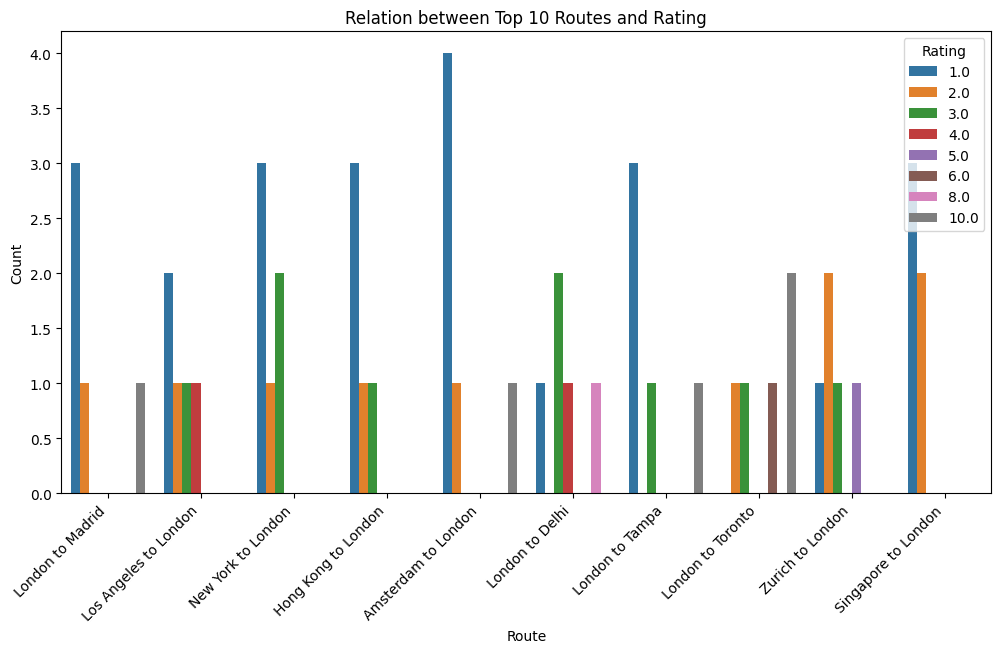

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_routes = df['Route'].value_counts().head(10).index
df_top_routes = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='Rating', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Rating")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Rating', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

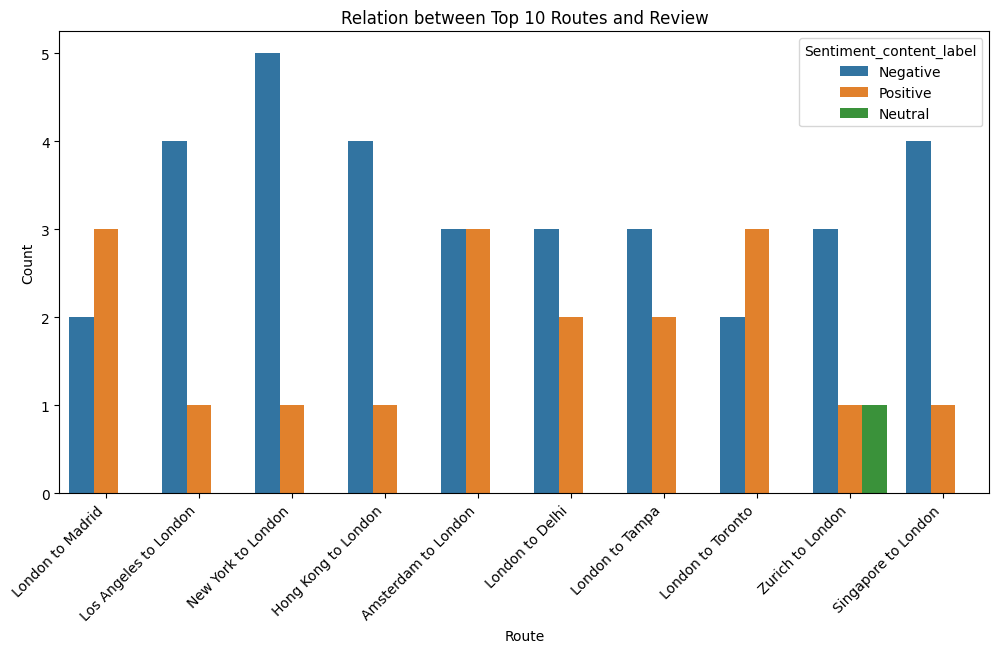

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


top_routes = df['Route'].value_counts().head(10).index
df_top_routes = df[df['Route'].isin(top_routes)]

#good_schedule = df[(df['Sentiment_content_label'] == 'Positive')  & (df['Rating'] > 5)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='Sentiment_content_label', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Review")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Sentiment_content_label', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

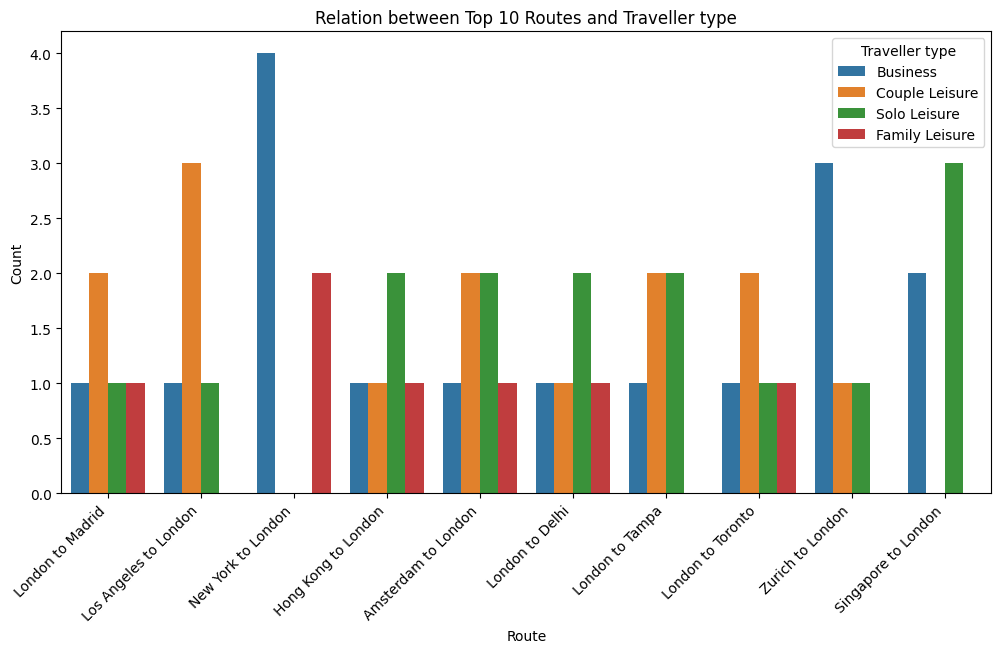

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_routes = df['Route'].value_counts().head(10).index
df_top_routes = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Route', hue='Traveller_type', data=df_top_routes)
plt.title("Relation between Top 10 Routes and Traveller type")
plt.xlabel("Route")
plt.ylabel("Count")
plt.legend(title='Traveller type', loc='upper right')
plt.xticks(rotation=45, ha="right")
plt.show()

# **Null Hypotesis Statement**

H0: there isn't any relationship
H1: there is a relationship

In [ ]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Review_title',
       'Review_content', 'Traveller_type', 'Class', 'Sentiment_content_label',
       'Sentiment_title_label', 'Origin', 'Destination', 'new_flying_Month',
       'new_flying_year', 'new_flying_month', 'Month_numeric', 'numeric_month',
       'season'],
      dtype='object')

In [ ]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Review_title',
       'Review_content', 'Traveller_type', 'Class', 'flying_m',
       'Sentiment_content_label', 'Sentiment_title_label', 'Origin',
       'Destination', 'new_flying_month', 'new_flying_year', 'numeric_month',
       'season'],
      dtype='object')

In [ ]:
df = df.drop('flying_m', axis=1)

In [ ]:
df = df.drop('Sentiment_title_label', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Passanger_Name           946 non-null    object 
 1   Flying_month             946 non-null    object 
 2   Route                    946 non-null    object 
 3   Rating                   946 non-null    float64
 4   Review_title             946 non-null    object 
 5   Review_content           946 non-null    object 
 6   Traveller_type           946 non-null    object 
 7   Class                    946 non-null    object 
 8   Sentiment_content_label  946 non-null    object 
 9   Origin                   946 non-null    object 
 10  Destination              946 non-null    object 
 11  new_flying_month         946 non-null    object 
 12  new_flying_year          946 non-null    object 
 13  numeric_month            946 non-null    int64  
 14  season                   9

In [ ]:
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['Traveller_type', 'Class', 'Sentiment_content_label', 'season'], drop_first=True)


In [ ]:
df['season']

0      2
1      1
2      2
3      2
4      2
      ..
941    0
942    2
943    2
944    2
945    2
Name: season, Length: 946, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Traveller_type'] = label_encoder.fit_transform(df['Traveller_type'])
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Sentiment_content_label'] = label_encoder.fit_transform(df['Sentiment_content_label'])
df['season'] = label_encoder.fit_transform(df['season'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Passanger_Name           946 non-null    object 
 1   Flying_month             946 non-null    object 
 2   Route                    946 non-null    object 
 3   Rating                   946 non-null    float64
 4   Review_title             946 non-null    object 
 5   Review_content           946 non-null    object 
 6   Traveller_type           946 non-null    int64  
 7   Class                    946 non-null    int64  
 8   Sentiment_content_label  946 non-null    int64  
 9   Origin                   946 non-null    object 
 10  Destination              946 non-null    object 
 11  new_flying_month         946 non-null    object 
 12  new_flying_year          946 non-null    object 
 13  numeric_month            946 non-null    int64  
 14  season                   9

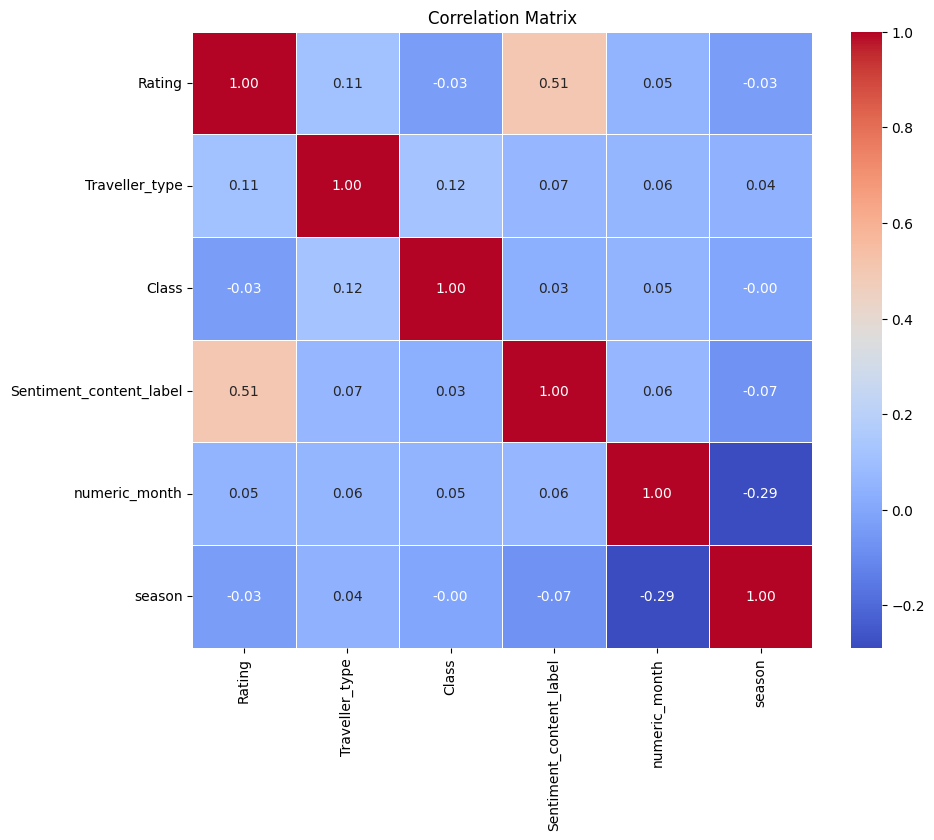

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()

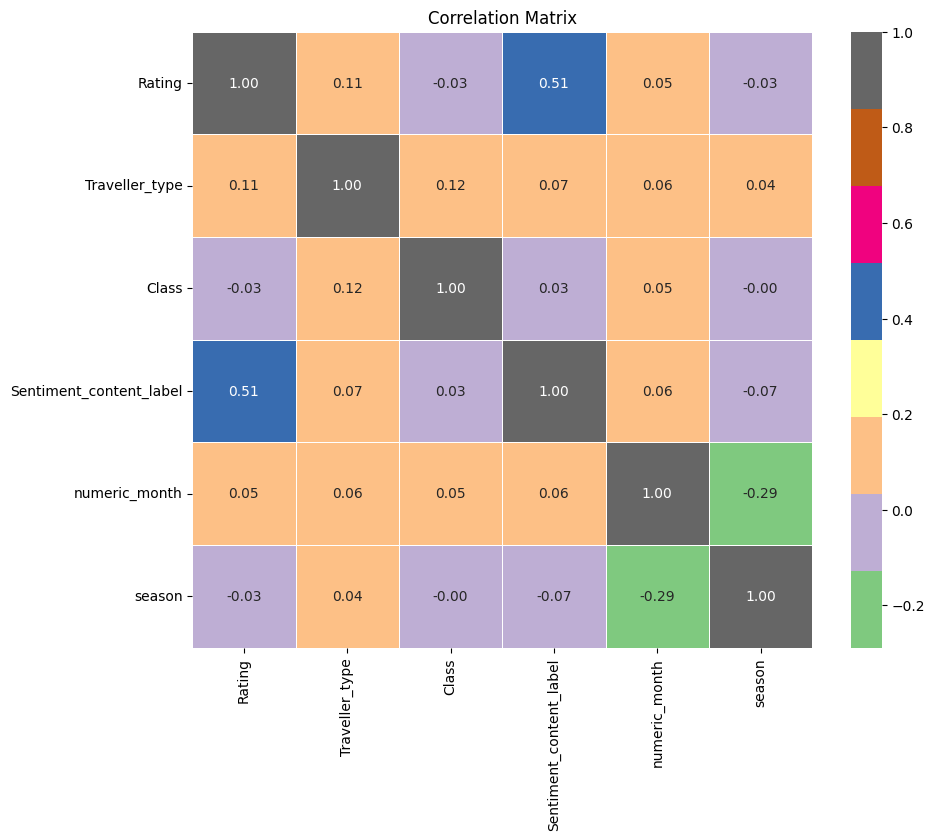

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Accent", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()